In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

# 1. Multivariate Linear Regression

In [2]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Preparation

In [3]:
# Lihat info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Karena data diatas terdapat missing values yang cukup banyak, maka drop kolom yang memiliki missing values lebih dari 20%. Lalu untuk missing values kurang dari 20% maka kita dapat mengisinya berdasarkan mean atau modus dari data kolomnya. 

In [4]:
# Drop columns yang memiliki missing values lebih dari 20%
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 'columns', inplace = True)

In [5]:
# Fill missing values kurang dari 20%
df = df.fillna({"LotFrontage": df["LotFrontage"].mean(),
          "MasVnrType": df["MasVnrType"].mode()[0],
          "MasVnrArea": df["MasVnrArea"].mode()[0],
          "BsmtQual": df["BsmtQual"].mode()[0],
          "BsmtCond": df["BsmtCond"].mode()[0],
          "BsmtExposure": df["BsmtExposure"].mode()[0],
          "BsmtFinType1": df["BsmtFinType1"].mode()[0],
          "BsmtFinType2": df["BsmtFinType2"].mode()[0],
          "Electrical": df["Electrical"].mode()[0],
          "GarageType": df["GarageType"].mode()[0],
          "GarageYrBlt": df["GarageYrBlt"].mean(),
          "GarageFinish": df["GarageFinish"].mode()[0],
          "GarageQual": df["GarageQual"].mode()[0],
          "GarageCond": df["GarageCond"].mode()[0]})

Dapat dilihat bahwa jumlah kolom yang terdapat pada dataframe diatas yaitu 81 kolom. Meskipun terdapat sangat banyak kolom, akan tetapi unique value dari setiap masing-masing kolom itu terbilang sedikit. Oleh karena itu kita bisa menggunakan semua kolom untuk ditraining.

In [6]:
# One Hot Encoding
df1 = pd.get_dummies(df)
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedD

In [7]:
# Defining feature matrix(X) and response vector(y)
X = df1.loc[:, df1.columns != 'SalePrice']
y = df1['SalePrice']

In [8]:
# Split X dan y menjadi data training dan data test dengan perbandingan 60-40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### Ridge Regression

In [9]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', model.coef_)

# regression intercept
print('Intercept: ', model.intercept_)

Coefficients:  [ 1.44420601e+00 -1.04919405e+02  3.34926023e+00  7.16898980e-01
  5.79387048e+03  5.54493466e+03  1.65650460e+02  5.62722289e+01
  9.04418820e+00  1.50536786e+01  4.90124974e+00 -3.94998859e+00
  1.60049405e+01  1.44193379e+01  2.15978979e+01 -4.03273412e+00
  3.19845007e+01  9.70783504e+01  1.78369887e+01  4.82631867e+03
  2.48232791e+03 -5.84523342e+02 -1.26072451e+04  1.32839668e+03
  3.73602354e+03 -7.72969866e+00  5.88002101e+03  1.47008811e+01
  1.20030379e+01  1.93344035e+01  1.05478130e+00  3.65674168e+01
  2.90170447e+01  4.52174151e+01  5.65238664e-01 -3.62074684e+02
 -4.80234626e+02 -2.80896192e+04  1.30521089e+04  1.50567452e+04
  3.58062918e+02 -3.77297812e+02  1.34330570e+03 -1.34330570e+03
 -2.03684580e+03  2.03420564e+03  1.16922091e+03 -1.16658075e+03
 -5.40612697e+03  1.30189999e+04 -1.34365277e+04  5.82365477e+03
  1.43465605e+04 -1.43465605e+04  2.48807150e+03  8.16053333e+03
 -1.84865962e+03 -7.90315462e+03 -8.96790594e+02  8.36115640e+03
  1.304755

In [10]:
y_pred = model.predict(X_test)

In [11]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

18565.200070833744

In [12]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1406981368.818601

In [13]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

37509.750316665675

In [14]:
# R Squared
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7871298967128413

Variance score: 0.7871298967128413


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


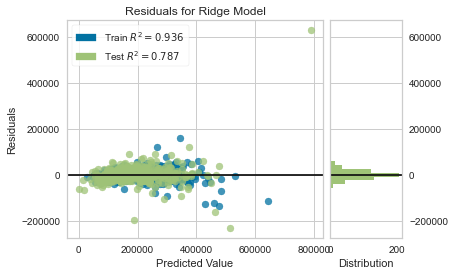

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

print('Variance score: {}'.format(model.score(X_test, y_test)))
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

Berdasarkan 3 metrics diatas, kita bisa lihat bahwa perbandingan nilai antara metrics (MAE= 18565.200) dengan (RMSE= 37509.750) menunjukkan hasil yang perbedaannya cukup besar. Dari hasil tersebut kita bisa simpulkan bahwa data diatas memiliki nilai yang outlier, sehingga nilai RMSE yang dihasilkan cukup jauh jika dibandingkan dengan MAE.

Kemudian untuk melihat kolom apa saja yang berpengaruh besar terhadap `SalePrice` dapat dilihat pada visualisasi dibawah ini.

C:\Users\PC\AppData\Local\Temp\ipykernel_11376\2710932867.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), cmap="PiYG", linewidths=.5)


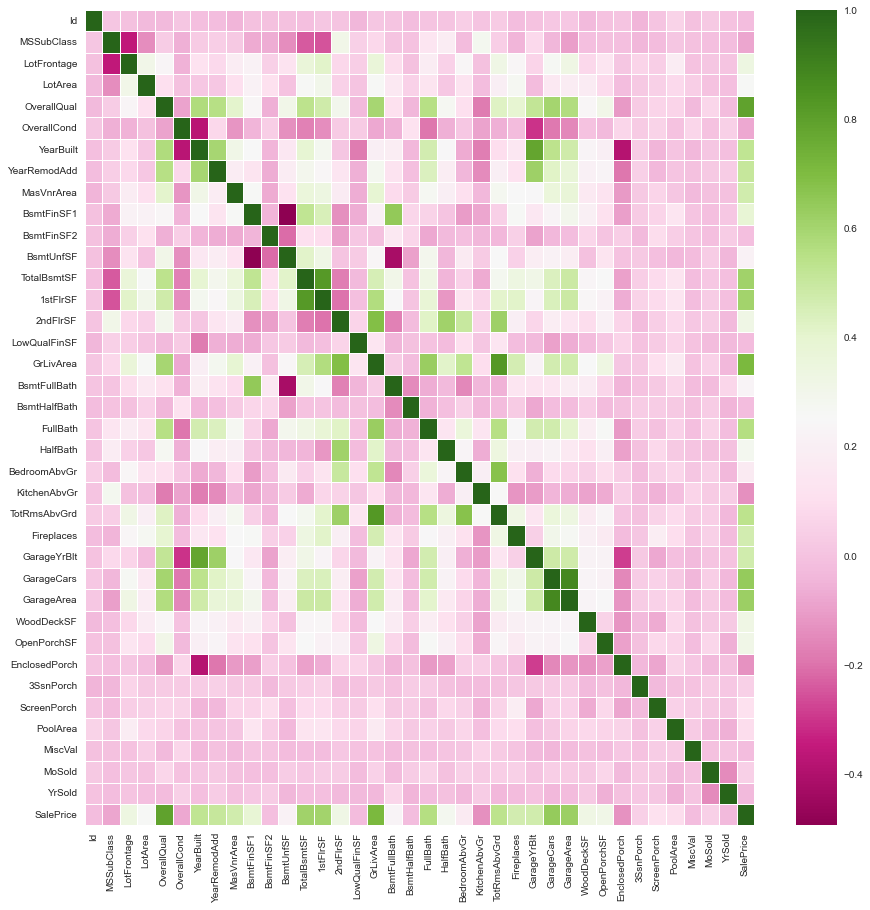

In [20]:
import seaborn as sns
plt.figure(figsize = (15,15))
ax = sns.heatmap(df.corr(), cmap="PiYG", linewidths=.5)

Bisa dilihat bahwa kolom `SalePrice` memiliki hubungan yang cukup kuat dengan beberapa kolom yang ditandai dengan berwarna kehijauan, seperti kolom "`OverallQual` = Material keseluruhan dan kualitas akhir", dan kolom "`GrLivArea` = Besar ruang tamu". Artinya semakin baik kualitas material yang digunakan dan semakin besar ruang tamunya, maka harga rumah `SalePrice` dari rumah tersebut akan semakin mahal.

---

# 2. Classification Models

In [21]:
df2 = pd.read_csv("heart.csv")
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Preparation

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [23]:
# Lihat perbandingan value dari kolom "HeartDisease"
df2['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

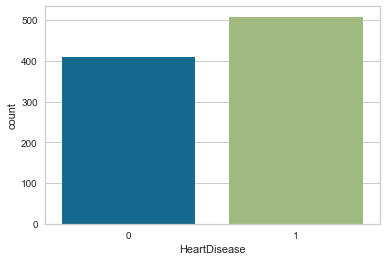

In [24]:
# Visualisasikan imbalanced data
import seaborn as sns
sns.countplot(x=df2["HeartDisease"])

In [25]:
# Resample data agar data menjadi seimbang
from sklearn.utils import resample

#create two different dataframe of majority and minority class
df2_minority = df2[(df2['HeartDisease']==0)]
df2_majority = df2[(df2['HeartDisease']==1)] 
# upsample minority class
df2_minority_upsampled = resample(df2_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 508, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df2_upsampled = pd.concat([df2_minority_upsampled, df2_majority])

In [26]:
# Cek kembali jumlah value
df2_upsampled["HeartDisease"].value_counts()

0    508
1    508
Name: HeartDisease, dtype: int64

In [27]:
# one hot encoding
df2 = pd.get_dummies(df2)
df2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [28]:
# defining feature matrix(X) and response vector(y)
X = df2.loc[:, df2.columns != 'HeartDisease']
y = df2['HeartDisease']

In [29]:
# Split X dan y menjadi data training dan data test dengan perbandingan 60-40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### Modeling

In [30]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [32]:
## Use Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [33]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [34]:
# Show best score
grid_search.best_score_

0.8708611022955675

In [35]:
# Show best estimator 
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

### Evaluation

In [36]:
y_lr = lr.predict(X_test) # Logistic Regression
y_rf_before = classifier_rf.predict(X_test) # Random Forest
y_rf_after = rf_best.predict(X_test) # Random Forest use Hyperparameter Tuning

In [37]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr)) # Logistic Regression
print(confusion_matrix(y_test, y_rf_before)) # Random Forest
print(confusion_matrix(y_test, y_rf_after)) # Random Forest use Hyperparameter Tuning

[[135  18]
 [ 28 187]]
[[128  25]
 [ 18 197]]
[[127  26]
 [ 20 195]]


In [38]:
## AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # Logistic Regression
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf_before, pos_label=1) # Random Forest
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf_after, pos_label=1) # Random Forest use Hyperparameter Tuning
print(auc(fpr, tpr))

0.8760601915184678
0.8764401884784923
0.8685210518315852


In [39]:
## Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr)) # Logistic Regression
print(classification_report(y_test, y_rf_before)) # Random Forest 
print(classification_report(y_test, y_rf_after)) # Random Forest use Hyperparameter Tuning

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       153
           1       0.91      0.87      0.89       215

    accuracy                           0.88       368
   macro avg       0.87      0.88      0.87       368
weighted avg       0.88      0.88      0.88       368

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       153
           1       0.89      0.92      0.90       215

    accuracy                           0.88       368
   macro avg       0.88      0.88      0.88       368
weighted avg       0.88      0.88      0.88       368

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       153
           1       0.88      0.91      0.89       215

    accuracy                           0.88       368
   macro avg       0.87      0.87      0.87       368
weighted avg       0.87      0.88      0.87       368



Kesimpulan:

Berdasarkan dari hasil training data diatas kita bisa lihat bahwa akurasi skor dari ketiga model memiliki hasil yang cukup serupa, terutama antara Logistic Regression dan Random Forest. Akan tetapi berdasarkan penilaian dari metrics Confusion matrix, Classification Report, dan AUC, model yang memiliki akurasi terbaik yaitu Random Forest sebelum atau tanpa Hyperparameter Tuning. Jika dilihat model Random Forest awal lebih baik dibandingkan dengan Random Forest after Hyperparameter Tuning. Hal tersebut mungkin saja terjadi, karena mungkin pemilihan Hyperparameternya yang kurang tepat atau datanya tidak terbagi dengan baik, sehingga akurasi skor yang dihasilkan tidak cukup optimal jika dibandingkan dengan Random Forest before Hyperparameter Tuning.